In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from types import NoneType
df=pd.read_csv('/content/fish.csv',header=None)

In [46]:
df.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [47]:
col=['Type','weight','l1','l2','l3','height','width']

In [48]:
df.columns=col
df.head()

,Type,weight,l1,l2,l3,height,width
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [49]:
x=df[['weight','l1']]

In [50]:
from sklearn.cluster import KMeans

In [51]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css=km.inertia_#will calculate within cluster sum of squares(wcss value )
  wcss.append(css)

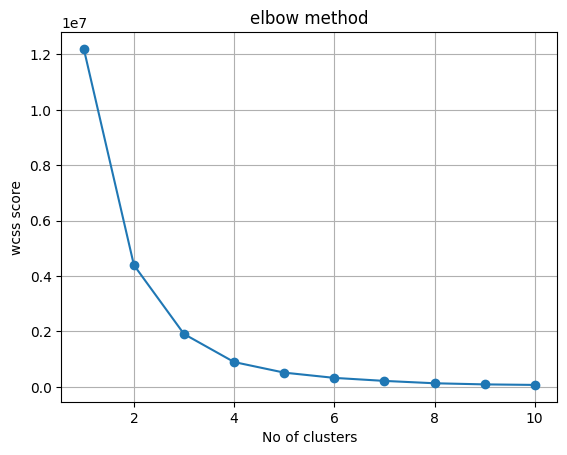

In [52]:
plt.plot(range(1,11),wcss,'o-')
plt.xlabel('No of clusters')
plt.ylabel('wcss score')
plt.title('elbow method')
plt.grid()
plt.show()

In [53]:
km=KMeans(n_clusters=4,n_init=10)
km.fit(x)

KMeans(n_clusters=4, n_init=10)

In [54]:
cluster_label=km.predict(x)

In [55]:
cluster_label

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3],
      dtype=int32)

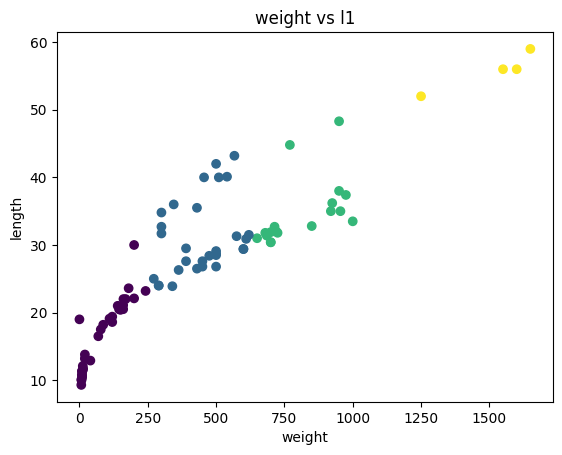

In [56]:
plt.scatter(x['weight'],x['l1'],c=cluster_label)
plt.xlabel('weight')
plt.ylabel('length')
plt.title('weight vs l1')
plt.show()

In [57]:
df['cluster labels']=cluster_label

In [58]:
df.head()

,Type,weight,l1,l2,l3,height,width,cluster labels
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4,0
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8,1
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1,1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3,1
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1,1


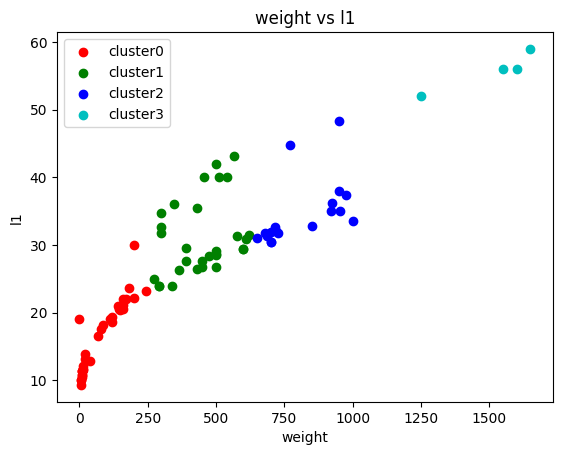

In [59]:
colors=['r','g','b','c']

for i in range(max(cluster_label+1)):
  cluster_data=x[cluster_label==i]
  plt.scatter(cluster_data['weight'],cluster_data['l1']
              ,c=colors[i],
              label=f'cluster{i}')
plt.xlabel('weight')
plt.ylabel('l1')
plt.title('weight vs l1')
plt.legend()
plt.show()

In [60]:
def predict_cluster(weight,l1):
  new_data=[[weight,l1]]
  cluster=km.predict(new_data)
  return cluster[0]

In [61]:
weight=20
l1=45
c=predict_cluster(weight,l1)
print(f'fish belongs to :{c}')

fish belongs to :0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [62]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [63]:
mergings=linkage(x,method='ward')

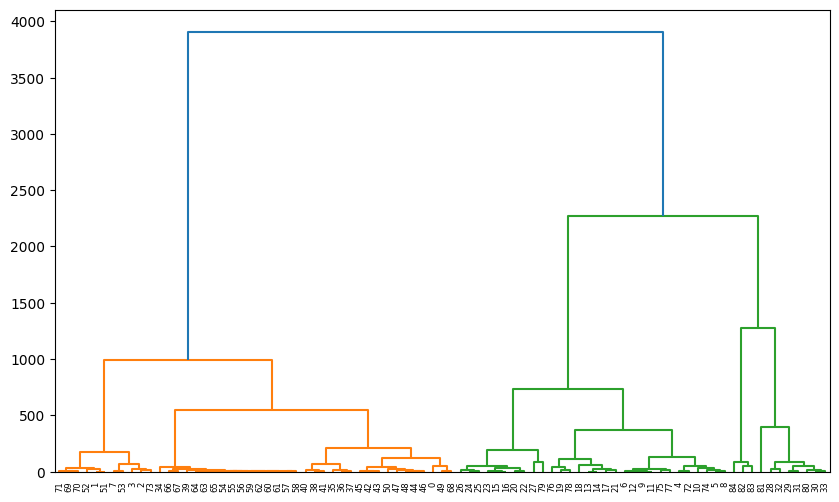

In [64]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [65]:
cluster_labels=fcluster(mergings,2500,criterion='distance')

In [66]:
cluster_labels

array([1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

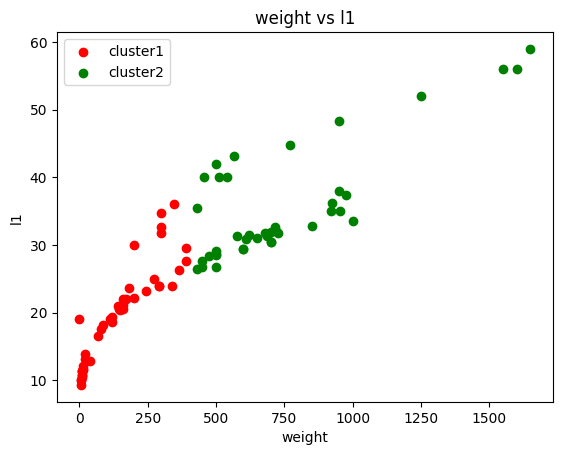

In [67]:
colors=['r','g']

for i in range(1,max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['weight'],cluster_data['l1']
              ,c=colors[i-1],
              label=f'cluster{i}')
plt.xlabel('weight')
plt.ylabel('l1')
plt.title('weight vs l1')
plt.legend()
plt.show()

In [68]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x,cluster_labels)
print(sil_avg)

0.5838805870259255
